
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
from pyspark.sql.types import TimestampType
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import col
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import month
from pyspark.sql.functions import year
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt

In [0]:
# File location and type
file_location = "/FileStore/tables/electronics-3.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
electronics = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

electronics.show(20)

+-------+-------+------+----------+-----------+--------------------+-----+----+---------+-----+
|item_id|user_id|rating| timestamp| model_attr|            category|brand|year|user_attr|split|
+-------+-------+------+----------+-----------+--------------------+-----+----+---------+-----+
|      0|      0|     5| 6/13/1999|     Female|Portable Audio & ...| null|1999|     null|    0|
|      0|      1|     5| 6/14/1999|     Female|Portable Audio & ...| null|1999|     null|    0|
|      0|      2|     3| 6/17/1999|     Female|Portable Audio & ...| null|1999|     null|    0|
|      0|      3|     1|  7/1/1999|     Female|Portable Audio & ...| null|1999|     null|    0|
|      0|      4|     2|  7/6/1999|     Female|Portable Audio & ...| null|1999|     null|    0|
|      0|      5|     2| 7/12/1999|     Female|Portable Audio & ...| null|1999|     null|    0|
|      0|      6|     5| 7/13/1999|     Female|Portable Audio & ...| null|1999|     null|    0|
|      0|      7|     2| 7/13/1999|     

In [0]:
# info of electronics dataset
num_rows1 = electronics.count()
num_columns1 = len(electronics.columns)
# Display the shape information
print(f"Info of electronics dataset: {num_rows1,num_columns1}")

Info of electronics dataset: (824423, 10)


In [0]:
# Display statistical summary of the electronics dataset
display(electronics.describe())
# the statistical summary of the dataset gives us the following information:

# 1. The mean rating is 4.0.

# 2. The minimum rating is 1.

# 3. The maximum rating is 5.

# 4. The standard deviation of the ratings is 1.3.

# 5. The total count of the rating is 824423

summary,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
count,824423,824423,824423,824423,824423,824423,222747,824423,112451,824423
mean,3429.734130416061,363612.7855979273,4.0660862203019565,null,null,null,null,2012.3364510694146,null,0.1489041426549235
stddev,2202.728341511266,215223.32960656058,1.351933676567659,null,null,null,null,2.6910215517429816,null,0.5077717865482618
min,0,0,1,1/1/2001,Female,Accessories & Supplies,Apple,1999,Female,0
max,999,99999,5,9/9/2015,Male,Wearable Technology,iRULU,2018,Male,2


In [0]:
# Create a list to store the number of unique values for each column
num_unique_values = []

# Loop through each column and calculate the approximate number of unique values
for col in electronics.columns:
    num_unique = electronics.select(col).distinct().count()
    num_unique_values.append((col, num_unique))

# Display the number of unique values for each column
for col, num_unique in num_unique_values:
    print(f"Number of unique values in {col}: {num_unique}")

Number of unique values in item_id: 9187
Number of unique values in user_id: 744828
Number of unique values in rating: 5
Number of unique values in timestamp: 5462
Number of unique values in model_attr: 3
Number of unique values in category: 10
Number of unique values in brand: 51
Number of unique values in year: 20
Number of unique values in user_attr: 3
Number of unique values in split: 3


In [0]:
# Group by the "rating" column and count occurrences
rating_distribution = electronics.groupBy("rating").count()

# Display the distribution of ratings using a bar chart
display(rating_distribution)

rating,count
3,65579
5,475903
1,85751
4,147896
2,49294


Out[47]: <AxesSubplot:xlabel='rating', ylabel='count'>

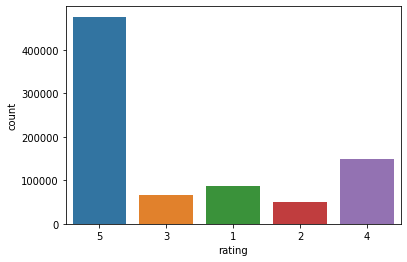

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
dataset_pd = electronics.select("rating").toPandas()

# Create a count plot using Seaborn
sns.countplot(x='rating', data=dataset_pd)

In [0]:
from pyspark.sql.functions import year, to_date

# timestamp type
electronics = electronics.withColumn("timestamp", to_date(electronics["timestamp"], "M/d/yyyy"))

# sales by year
sales_by_year = electronics.withColumn("year", year(electronics["timestamp"])).groupBy("year").count()

# Display the count of sales for each year
sales_by_year.show()



+----+------+
|year| count|
+----+------+
|2003|   833|
|2007|  6798|
|2006|  2614|
|2004|  1275|
|2012| 38389|
|2009| 12804|
|2001|   403|
|2005|  2170|
|2000|   187|
|2010| 16888|
|2011| 23894|
|2008|  9428|
|1999|    47|
|2002|   481|
|2013| 99855|
|2014|180676|
|2015|320887|
|2016|106794|
+----+------+



In [0]:
# Check for missing values in the "year" column
missing_values = electronics.filter(electronics["year"].isNull()).count()
print("Number of missing values in the 'year' column:", missing_values)


Number of missing values in the 'year' column: 0


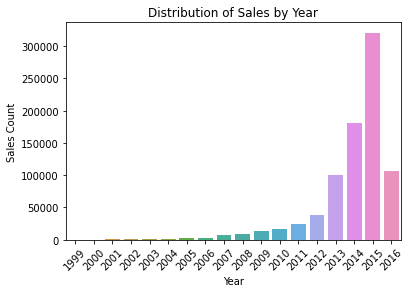

In [0]:
from pyspark.sql.functions import year

# Convert the 'timestamp' column to year
electronics = electronics.withColumn("year", year("timestamp"))

# Count the number of sales by year
sales_by_year = electronics.groupBy("year").count().orderBy("year")

# Convert PySpark DataFrame to Pandas DataFrame for plotting
sales_by_year_pd = sales_by_year.toPandas()

# Create a plot using Seaborn
sns.barplot(x='year', y='count', data=sales_by_year_pd)
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Distribution of Sales by Year')
plt.xticks(rotation=45)
plt.show()



In [0]:
# what is the best month of sales

# Extract the month from the "timestamp" column
electronics = electronics.withColumn("month", month("timestamp"))

# Group by the "month" column and count occurrences
sales_by_month = electronics.groupBy("month").count()

# Display the count of sales for each month
display(sales_by_month)

month,count
12,86554
1,99965
6,49878
3,83185
5,48233
9,61348
4,60128
8,64550
7,60355
10,63344


Out[52]: <AxesSubplot:xlabel='month', ylabel='count'>

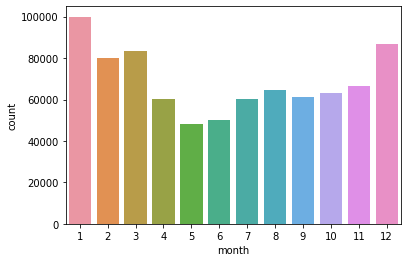

In [0]:
# the distribution of sales by months
dataset_pd = electronics.select("month").toPandas()

# Create a count plot using Seaborn
sns.countplot(x='month', data=dataset_pd)

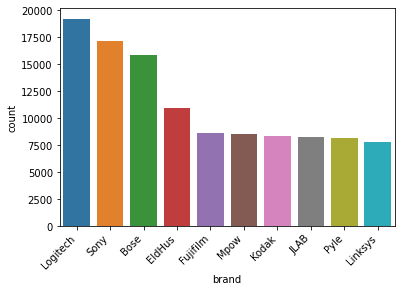

In [0]:
# brands with the most sales

# Convert PySpark DataFrame to Pandas DataFrame
dataset_pd = electronics.select("brand").toPandas()

# Create a count plot for the top 10 brands with the most sales
sns.countplot(x='brand', data=dataset_pd, order=dataset_pd['brand'].value_counts().iloc[:10].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

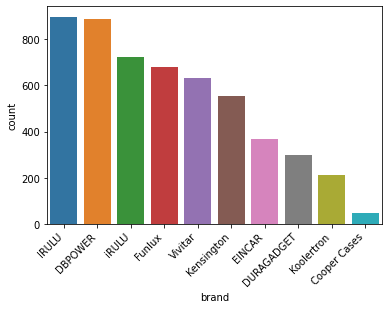

In [0]:
# What brand name sold the least?

# Convert PySpark DataFrame to Pandas DataFrame
dataset_pd = electronics.select("brand").toPandas()

# Create a count plot for the bottom 10 brands with the least sales
sns.countplot(x='brand', data=dataset_pd, order=dataset_pd['brand'].value_counts().iloc[-10:].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

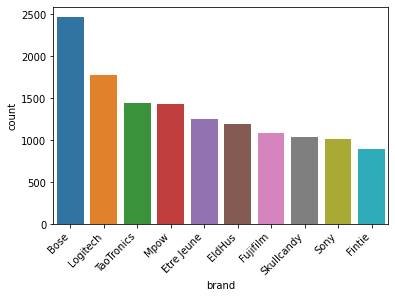

In [0]:
# brands with the most sales in 2016

from pyspark.sql.functions import col
# Filter the DataFrame to include only data from the year 2016
dataset_2016 = electronics.filter(col("year") == 2016)

# Convert PySpark DataFrame to Pandas DataFrame
dataset_2016_pd = dataset_2016.select("brand").toPandas()

# Create a count plot for the top 10 brands with the most sales in 2016
sns.countplot(x='brand', data=dataset_2016_pd, order=dataset_2016_pd['brand'].value_counts().iloc[:10].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Out[56]: <AxesSubplot:xlabel='month', ylabel='count'>

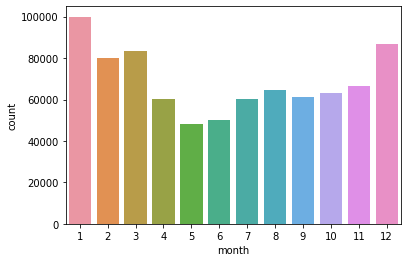

In [0]:
# month with most sales

from pyspark.sql.functions import col
# Convert the "timestamp" column to a timestamp type (if not done already)
electronics = electronics.withColumn("timestamp", col("timestamp").cast(TimestampType()))

# Extract the month from the "timestamp" column
electronics = electronics.withColumn("month", month("timestamp"))

# Convert PySpark DataFrame to Pandas DataFrame
dataset_pd = electronics.select("month").toPandas()

# Create a count plot for the sales in each month
sns.countplot(x='month', data=dataset_pd)

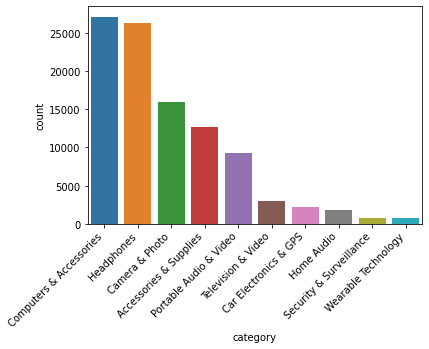

In [0]:
# What products by category were sold the most in January

from pyspark.sql.functions import col
# Convert the "timestamp" column to a timestamp type (if not done already)
electronics = electronics.withColumn("timestamp", col("timestamp").cast(TimestampType()))

# Extract the month from the "timestamp" column
electronics = electronics.withColumn("month", month("timestamp"))

# Filter the DataFrame to include only data from the month of January
dataset_january = electronics.filter(col("month") == 1)

# Convert PySpark DataFrame to Pandas DataFrame
dataset_january_pd = dataset_january.select("category").toPandas()

# Create a count plot for the top 10 categories with the most sales in January
sns.countplot(x='category', data=dataset_january_pd, order=dataset_january_pd['category'].value_counts().iloc[:10].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Out[58]: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Headphones'),
  Text(1, 0, 'Computers & Accessories'),
  Text(2, 0, 'Camera & Photo'),
  Text(3, 0, 'Accessories & Supplies'),
  Text(4, 0, 'Portable Audio & Video'),
  Text(5, 0, 'Television & Video'),
  Text(6, 0, 'Car Electronics & GPS'),
  Text(7, 0, 'Home Audio'),
  Text(8, 0, 'Wearable Technology'),
  Text(9, 0, 'Security & Surveillance')])

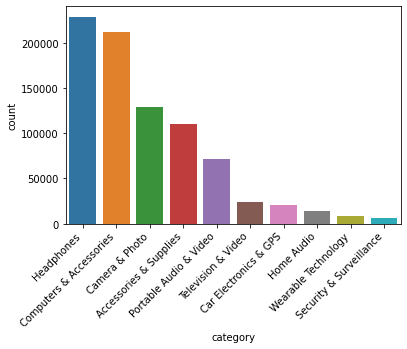

In [0]:
# Category with the least sales

# Convert PySpark DataFrame to Pandas DataFrame
dataset_pd = electronics.select("category").toPandas()

# Create a count plot for the bottom 10 categories with the least sales
sns.countplot(x='category', data=dataset_pd, order=dataset_pd['category'].value_counts().iloc[-10:].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

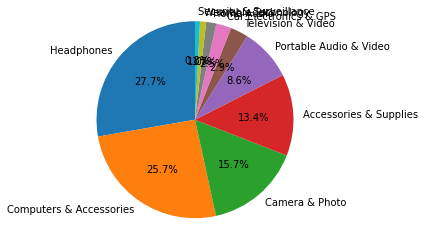

In [0]:
# distribution of sales presented in a pie chart

from pyspark.sql.functions import col
# Calculate the normalized value counts for each category
category_distribution = electronics.groupBy('category').count().orderBy('count', ascending=False)
category_distribution = category_distribution.withColumn('normalized_count', col('count') / electronics.count())

# Convert PySpark DataFrame to Pandas DataFrame
category_distribution_pd = category_distribution.select('category', 'normalized_count').toPandas()

# Plot a pie chart for the top 10 categories
plt.pie(category_distribution_pd['normalized_count'].head(10), labels=category_distribution_pd['category'].head(10), autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()

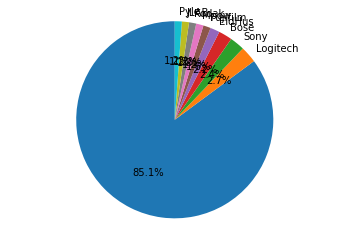

In [0]:
# brand percentage sales

# Calculate the count of ratings for each brand
brand_counts = electronics.groupBy('brand').count().orderBy('count', ascending=False)

# Calculate the percentage sales for each brand
total_sales = brand_counts.select('count').agg({'count': 'sum'}).collect()[0]['sum(count)']
brand_percentage = brand_counts.withColumn('percentage_sales', col('count') / total_sales * 100)

# Convert PySpark DataFrame to Pandas DataFrame
brand_percentage_pd = brand_percentage.select('brand', 'percentage_sales').toPandas()

# Plot a pie chart for the top 10 brands
plt.pie(brand_percentage_pd['percentage_sales'].head(10), labels=brand_percentage_pd['brand'].head(10), autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()